# Python 機器學習從零至一 

> 表現的評估

[數據交點](https://www.datainpoint.com/) | 郭耀仁 <yaojenkuo@datainpoint.com>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from pyvizml import ClfMetrics

## 如何評估機器學習模型

## 機器學習模型是基於最小化損失函數所建立

- 透過相同的損失函數評估表現。
- 差別在於究竟要比對哪一組目標向量 $y$。

## 找尋係數向量的依據

基於最小化 $y^{(train)}$ 與 $\hat{y}^{(train)}$ 之間的誤差。

## 數值預測任務以均方誤差（Mean squared error, MSE）來表示

\begin{equation}
\operatorname*{arg\,min}_w \; \text{MSE}^{(train)} = \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - \hat{y_i}^{(train)})^2}
\end{equation}

## 類別預測任務是以誤分類數（Error）來表示

\begin{align}
\operatorname*{arg\,min}_w \; \text{Errors}^{(train)} = \sum_j n(E^{(train)}_j) \\ \text{ where } E^{(train)}_j \; \text{represents the occurrence of } y^{(train)}_j \neq \hat{y^{(train)}_j}
\end{align}

## 評估迴歸模型的表現同樣是比較預測目標向量與實際目標向量之間的誤差

但是改為驗證資料或測試資料的目標向量。

\begin{equation}
\text{MSE}^{(valid)} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

## 評估分類器的表現評估以誤分類數衡量

但是改為驗證資料或測試資料的目標向量。

\begin{align}
\text{Errors}^{(valid)} = \sum_j n(E^{(valid)}_j) \\ \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

## 訓練、驗證與測試

- 機器學習專案中的訓練、驗證來自具備已實現數值或標籤資料集。
- 測試則來自未實現數值或標籤資料集。
- 在從未見過的測試資料上之表現將決定它是否會被部署到正式環境開始運作。

## 現實世界中評估模型在測試資料上的表現不容易

- 時間與金錢成本上都比在驗證資料上實施來得高出許多。
- 像是設計類似實驗組與對照組的測試環境、等待一段時間才會實現數值或標籤。

## 評估指標的選擇

- 除了與任務種類相關，也與模型的應用場景有關。
- 例如即便同屬於疾病的檢測分類模型，針對傳染疾病或罕見疾病所選擇的指標就有可能不同。
- 這是由於和「誤分類」所衍生出的成本連動所致。

## 評估數值預測任務的表現

## 回歸模型表現的評估指標

- 均方誤差（Mean squared error）
- 平均絕對誤差（Mean absolute error）

## 使用 Scikit-Learn 定義好的 `mean_squared_error()` 函數可以計算兩個目標向量之間的均方誤差

In [2]:
csv_url = "https://raw.githubusercontent.com/yaojenkuo/ml-newbies/master/player_stats.csv"
player_stats = pd.read_csv(csv_url)
X = player_stats['heightMeters'].values.reshape(-1, 1)
y = player_stats['weightKilograms'].values.astype(float)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
h = LinearRegression()
h.fit(X_train, y_train)
y_hat = h.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_hat)
mse_valid

62.807098266825335

## 自訂均方誤差函數

In [3]:
def meanSquaredError(y_true, y_pred):
    error = (y_true - y_pred)
    squared_error = error**2
    mean_squared_error = np.mean(squared_error)
    return mean_squared_error

In [4]:
mse_valid = meanSquaredError(y_valid, y_hat)
mse_valid

62.807098266825335

## 平均絕對誤差（Mean absolute error）

- 平均絕對誤差和均方誤差相同之處在於他們都能精確捕捉預測失準的量值。
- 相異之處在於均方誤差對於預測失準較多的離群值（Outliers）具有放大的效果。
- 均方誤差適用於離群值會導致錯誤預測的成本更大幅度上升的應用場景。

## 使用 Scikit-Learn 定義好的 `mean_absolute_error()` 函數可以計算兩個目標向量之間的平均絕對誤差

In [5]:
mae_valid = mean_absolute_error(y_valid, y_hat)
mae_valid

6.05751079717632

## 自訂平均絕對誤差的函數

In [6]:
def meanAbsoluteError(y_true, y_pred):
    error = (y_true - y_pred)
    absolute_error = np.abs(error)
    mean_absolute_error = np.mean(absolute_error)
    return mean_absolute_error

In [7]:
mae_valid = meanAbsoluteError(y_valid, y_hat)
mae_valid

6.05751079717632

## 評估類別預測任務的表現

## 分類器使用的評估指標比迴歸模型為多

- 準確率（Accuracy）
- 精確率（Precision）
- 召回率（Recall）
- F1-score
- ...等。

## 理解評估分類器指標的設計

拆解正確分類 $y^{(valid)} = \hat{y}^{(valid)}$ 與錯誤分類 $y^{(valid)} \neq \hat{y}^{(valid)}$ 的組成。

## 正確分類與錯誤分類各自都還能拆解成兩種情境

- 正確分類
    - 真陰性（True negative, TN）：$y^{(valid)}=0$ 並且 $\hat{y}^{(valid)}=0$
    - 真陽性（True positive, TP）：$y^{(valid)}=1$ 並且 $\hat{y}^{(valid)}=1$
- 錯誤分類
    - 偽陰性（False negative, FN）：$y^{(valid)}=1$ 並且 $\hat{y}^{(valid)}=0$
    - 偽陽性（False positive, FP）：$y^{(valid)}=0$ 並且 $\hat{y}^{(valid)}=1$

## 混淆矩陣（Confusion matrix）

以 $2 \times 2$ 矩陣表達正確、錯誤分類的情境。

||$\hat{y}^{(valid)}=0$|$\hat{y}^{(valid)}=1$|
|---|---|---|
|$y^{(valid)}=0$|真陰性（True negative, TN）|偽陽性（False positive, FP）|
|$y^{(valid)}=1$|偽陰性（False negative, FN）|真陽性（True positive, TP）|

## 評估指標可以從組成混淆矩陣的四個象限衍生而得

使用 Scikit-Learn 定義好的 `confusion_matrix` 函數創造兩個目標向量之間正確分類、錯誤分類所組成的混淆矩陣。

In [8]:
X = player_stats[['apg', 'rpg']].values
pos = player_stats['pos'].values
y = np.array([0 if p[0] == 'G' else 1 for p in pos])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
h = LogisticRegression()
h.fit(X_train, y_train)
y_hat = h.predict(X_valid)
cm = confusion_matrix(y_valid, y_hat)
cm

array([[67, 10],
       [18, 71]])

## 自訂創造混淆矩陣的函數

In [9]:
def confusionMatrix(y_true, y_pred):
    n_unique = np.unique(y_true).size
    cm = np.zeros((n_unique, n_unique), dtype=int)
    for i in range(n_unique):
        for j in range(n_unique):
            n_obs = np.sum(np.logical_and(y_true == i, y_pred == j))
            cm[i, j] = n_obs
    return cm

In [10]:
cm = confusionMatrix(y_valid, y_hat)
cm

array([[67, 10],
       [18, 71]])

## 準確率（Accuracy）

是類別預測任務最常用的評估指標。

\begin{equation}
\text{Accuracy} = \frac{\text{TN} + \text{TP}}{\text{TN} + \text{TP} + \text{FN} + \text{FP}}
\end{equation}

## 使用 Scikit-Learn 定義好的 `accuracy_score` 函數可以計算準確率

In [11]:
accuracy = accuracy_score(y_valid, y_hat)
accuracy

0.8313253012048193

## 準確率不適合評估分類器的場景

- 陽性事件發生率極低的應用場景，例如罕見疾病或市場黑天鵝事件的預測任務。
- 如果設計出一個樸素的分類器（Dummy classifier），它以目標向量中出現頻率最高的類別作為預測依據
- 以 1,000 個觀測值中僅有 1 個陽性的情況舉例，準確率可以達到 0.999，是一個乍看之下非常漂亮的表現。

In [12]:
y_true = np.zeros(1000, dtype=int)
y_true[-1] = 1
y_hat = np.zeros(1000, dtype=int)
accuracy = accuracy_score(y_true, y_hat)
accuracy

0.999

## 樸素分類器對預測陽性事件發生完全無用處

這時使用精確率（Precision）與召回率（Recall）來進行評估會更加適合。

## 精確率

- 分子是真陽性、分母是真陽性加偽陽性。
- 它的意涵是分類器在所有預測為陽性的觀測值中，正確預測的觀測值數為多少。

\begin{align}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{align}

## 召回率

- 分子是真陽性、分母是真陽性加偽陰性。
- 它的意涵是分類器在所有陽性的觀測值中，正確預測的觀測值數為多少。

\begin{align}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{align}

## 精確率與召回率更專注評估分類器對陽性事件的預測能力

- 兩個指標愈高，代表模型的表現愈好。
- 精確率如果表現要好除了真陽性高，偽陽性亦要想辦法降低。
- 召回率如果表現要好除了真陽性高，偽陰性亦要想辦法降低。

## 如何選擇採用精確率或召回率

- 延伸探討偽陽性或偽陰性所衍生的誤分類成本。
- 採用精確率代表的要盡可能降低偽陽性，這表示的是偽陽性的成本高，意味著是誤判為陽性事件的成本高（例如誤診而進行高風險的手術）。
- 採用召回率代表的是要儘可能降低偽陰性，這表示的是偽陰性的成本高，意味著是誤判為陰性事件的成本高（例如誤診而導致超級傳播者沒有隔離而進入社區）。

## 使用 Scikit-Learn 定義好的 `precision_score()` 與 `recall_score()` 函數可以計算精確率與召回率

In [13]:
# 樸素分類器在精確率和召回率都得到了最低的評估值
precision = precision_score(y_true, y_hat, zero_division=0)
recall = recall_score(y_true, y_hat)
print(precision)
print(recall)

0.0
0.0


## F-score

同時將精確率與召回率納入考量，運用一個係數 $\beta$ 加權兩個指標合成為一個指標。

\begin{equation}
F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}
\end{equation}

## $\beta$ 係數表示對精確率或召回率的相對重視程度

- 如果偽陽性的成本遠高於偽陰性的成本，代表百分百重視精確率，這時代入 $\beta = 0$，F-score 就會是精確率。
- 如果偽陰性的成本遠高於偽陽性的成本，代表百分百重視召回率，這時代入 $\beta = \infty$，F-score 就會是召回率。
- 如果偽陽性的成本和偽陰性的成本相當，代表兩個指標同等重要，這時代入 $\beta = 1$，F-score 就被稱為 F1-score，指標愈高，代表模型的表現愈好。

\begin{equation}
F_{1} = 2 \cdot \frac{precision \cdot recall}{precision + recall}
\end{equation}

## 使用 Scikit-Learn 定義好的 `f1_score()` 函數可以計算 F1-score

同樣可以看到樸素分類器依然在 F1-score 獲得了最低的評估值。

In [14]:
f1 = f1_score(y_true, y_hat)
f1

0.0

## 自訂計算評估指標的類別 `ClfMetrics`

```python
class ClfMetrics:
    """
    This class calculates some of the metrics of classifier including accuracy, precision, recall, f1 according to confusion matrix.
    Args:
        y_true (ndarray): 1d-array for true target vector.
        y_pred (ndarray): 1d-array for predicted target vector.
    """
    def __init__(self, y_true, y_pred):
        self._y_true = y_true
        self._y_pred = y_pred
```

```python
    def confusion_matrix(self):
        """
        This function returns the confusion matrix given true/predicted target vectors.
        """
        n_unique = np.unique(self._y_true).size
        cm = np.zeros((n_unique, n_unique), dtype=int)
        for i in range(n_unique):
            for j in range(n_unique):
                n_obs = np.sum(np.logical_and(self._y_true == i, self._y_pred == j))
                cm[i, j] = n_obs
        self._tn = cm[0, 0]
        self._tp = cm[1, 1]
        self._fn = cm[1, 0]
        self._fp = cm[0, 1]
        return cm
```

```python
    def accuracy_score(self):
        """
        This function returns the accuracy score given true/predicted target vectors.
        """
        cm = self.confusion_matrix()
        accuracy = (self._tn + self._tp) / np.sum(cm)
        return accuracy
    def precision_score(self):
        """
        This function returns the precision score given true/predicted target vectors.
        """
        precision = self._tp / (self._tp + self._fp)
        return precision
```

```python
    def recall_score(self):
        """
        This function returns the recall score given true/predicted target vectors.
        """
        recall = self._tp / (self._tp + self._fn)
        return recall
    def f1_score(self, beta=1):
        """
        This function returns the f1 score given true/predicted target vectors.
        Args:
            beta (int, float): Can be used to generalize from f1 score to f score.
        """
        precision = self.precision_score()
        recall = self.recall_score()
        f1 = (1 + beta**2)*precision*recall / ((beta**2 * precision) + recall)
        return f1
```

In [15]:
h = LogisticRegression()
h.fit(X_train, y_train)
y_hat = h.predict(X_valid)

In [16]:
# 混淆矩陣
clf_metrics = ClfMetrics(y_valid, y_hat)
clf_metrics.confusion_matrix()

array([[67, 10],
       [18, 71]])

In [17]:
# 準確率
clf_metrics.accuracy_score()

0.8313253012048193

In [18]:
# 精確率
clf_metrics.precision_score()

0.8765432098765432

In [19]:
# 召回率
clf_metrics.recall_score()

0.797752808988764

In [20]:
# F1-score
clf_metrics.f1_score()

0.8352941176470587

## 誤差的來源

## 誤差來源可以大抵分為

- 訓練誤差（Training error）
- 測試誤差（Testing error）

## 訓練與測試誤差

- 在已實現、具備目標值或標籤的訓練、驗證資料上表現良好，表示它的訓練誤差小。
- 在尚未實現、不具備目標值或標籤的測試資料上表現良好，表示它的測試誤差小（又稱為泛化能力強）。
- 不過在現實世界中，處於訓練與驗證階段時對於測試資料是一無所知的，如何在只能接觸到訓練與驗證資料時去降低測試誤差？

## 訓練、驗證與測試資料的 i.i.d. 假設

- 資料中每一筆觀測值彼此獨立（Independent）。
- 訓練、驗證與測試資料來自同樣分佈（Identically distributed）的母體。

## 機器學習演算方法的目標

1. 減少訓練誤差。
2. 減少訓練誤差與測試誤差的間距。

## 減少訓練誤差的具體做法

- 增加梯度遞減的訓練次數。
- 透過交叉驗證（Cross validation）的技巧消弭訓練與驗證資料切割所造成的誤差。
- 增加特徵矩陣的欄位。

## 減少訓練誤差與測試誤差的間距

引用正規化（Regularization）的技巧。

## 藉由增加梯度遞減的訓練次數減少訓練誤差的做法是直觀的

隨機初始化的 $w$ 的訓練誤差是高的，隨著訓練次數增加而漸漸減少。

## 交叉驗證

- 希望避免某個隨機狀態劃分出了不夠均勻的訓練和驗證資料。
- 將資料拆分為 `k` 個不重複的子集合，進而可以在這些子集合上重複進行訓練和驗證。
- 取平均值來評估誤差。

## 使用 Scikit-Learn 定義好的 `KFold` 類別可以獲得交叉驗證時訓練與驗證資料的位置

In [21]:
shuffled_index = player_stats.index.values.copy()
np.random.seed(42)
np.random.shuffle(shuffled_index)
X = player_stats['heightMeters'].values[shuffled_index].reshape(-1, 1)
y = player_stats['weightKilograms'].values[shuffled_index]
kf = KFold(n_splits=5)
h = LinearRegression()
mse_scores = []
for train_index, valid_index in kf.split(X):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    h.fit(X_train, y_train)
    y_hat = h.predict(X_valid)
    mse = mean_squared_error(y_valid, y_hat)
    mse_scores.append(mse)
mean_mse_scores = np.mean(mse_scores)
print(mse_scores)
print(mean_mse_scores)

[57.14720780591702, 65.53573256896999, 42.70574885562969, 48.253060797861444, 55.4763785628591]
53.823625718247456


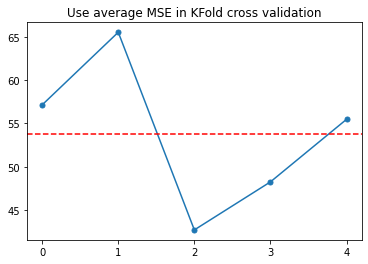

In [22]:
fig= plt.figure()
ax = plt.axes()
ax.plot(mse_scores, marker='.', markersize=10)
ax.axhline(mean_mse_scores, color='red', linestyle="--")
ax.set_title('Use average MSE in KFold cross validation')
ax.set_xticks(range(5))
plt.show()

## 增加特徵矩陣的欄位

- 可以使用 Scikit-Learn 定義好的 `PolynomialFeatures` 類別創造高次項觀察訓練誤差在不同 `degree` 下的訓練誤差。
- 以迴歸模型為例，當訓練誤差很高的時候模型處於「配適不足」（Underfitting）的狀態，像是 `degree=0` 的時候。

In [23]:
X = player_stats['heightMeters'].values.reshape(-1, 1)
X_plot = np.linspace(X.min() - 0.1, X.max().max() + 0.1).reshape(-1, 1)
y = player_stats['weightKilograms'].values
degrees = range(9)
y_plots = []
training_errors = []
for d in degrees:
    poly = PolynomialFeatures(d)
    X_poly = poly.fit_transform(X)
    X_train, X_valid, y_train, y_valid = train_test_split(X_poly, y, test_size=0.33, random_state=42)
    h = LinearRegression()
    h.fit(X_train, y_train)
    y_pred = h.predict(X_train)
    training_error = mean_squared_error(y_train, y_pred)
    training_errors.append(training_error)
    X_plot_poly = poly.fit_transform(X_plot)
    y_pred = h.predict(X_plot_poly)
    y_plots.append(y_pred)

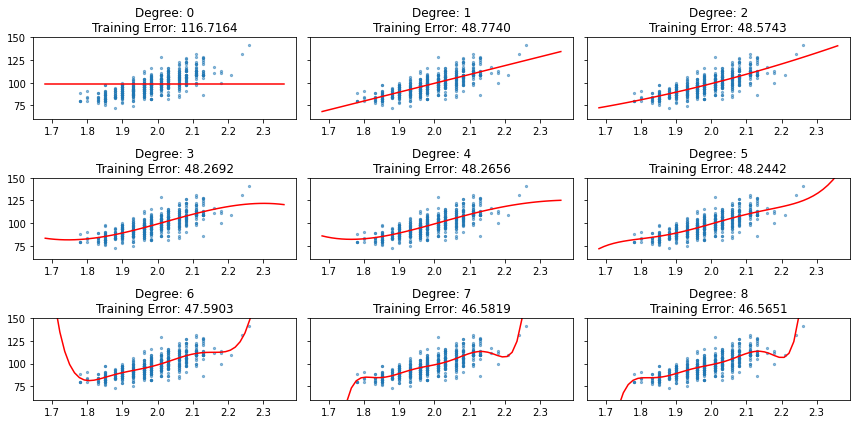

In [24]:
x = X.ravel()
fig, axes = plt.subplots(3, 3, figsize=(12, 6), sharey=True)
for k, d, te, y_p in zip(range(9), degrees, training_errors, y_plots):
    i = k // 3
    j = k % 3
    x_p = X_plot.ravel()
    axes[i, j].scatter(x, y, s=5, alpha=0.5)
    axes[i, j].plot(x_p, y_p, color="red")
    axes[i, j].set_ylim(60, 150)
    axes[i, j].set_title("Degree: {}\nTraining Error: {:.4f}".format(d, te))
plt.tight_layout()
plt.show()

## 更多減少訓練誤差的方式

- 超參數（Hyperparameter）調校。
- 變換其他機器學習模型。
- 製造衍生變數（特徵工程）。
- ...等。

## 減少訓練誤差與測試誤差的間距

- 減少訓練誤差的過程，很有可能伴隨而來的是驗證或測試誤差的升高。
- 模型對於訓練資料過於熟悉，而降低了它的泛化能力。
- 這樣的狀態我們稱之為「過度配適」（Overfitting）。

## 正規化（Regularization）

- 讓機器學習模型在保留多個變數、減少訓練誤差的前提下，避免產生過度配適。
- 使用一個參數 $\lambda$ 在訓練過程中對係數向量壓抑。

## 以數值預測任務為例，在原本的誤差函式 $J(w)$ 加上 $\lambda w^Tw$ 抑制係數向量，又被稱為 L2 正規化

\begin{equation}
J(w) = \frac{1}{m}(\parallel Xw - y \parallel^2 + \lambda w^Tw)
\end{equation}

## 求解梯度 $J(w)$ 關於 $w$ 的偏微分

\begin{align}
\frac{\partial J}{\partial w} &= \frac{1}{m}(\frac{\partial}{\partial w}(\parallel Xw - y\parallel^2) + \frac{\partial}{\partial w}\lambda w^Tw) \\
&= \frac{1}{m}(\frac{\partial}{\partial w}(Xw - y)^T(Xw-y) + \frac{\partial}{\partial w}\lambda w^Tw)\\
&= \frac{1}{m}(\frac{\partial}{\partial w}(w^TX^TXw - w^TX^Ty - y^TXw + y^Ty) + \frac{\partial}{\partial w}\lambda w^Tw) \\
&= \frac{1}{m}(\frac{\partial}{\partial w}(w^TX^TXw - (Xw)^Ty - (Xw)^Ty + y^Ty) + \frac{\partial}{\partial w}\lambda w^Tw)\\
&= \frac{1}{m}(\frac{\partial}{\partial w}(w^TX^TXw - 2(Xw)^Ty + y^Ty) + \frac{\partial}{\partial w}\lambda w^Tw) \\
&= \frac{1}{m}(2X^TXw - 2X^Ty + 2\lambda w) \\
&= \frac{2}{m}(X^TXw - X^Ty + \lambda w) \\
&= \frac{2}{m}(X^T(Xw - y) + \lambda w)) \\
&= \frac{2}{m}(X^T(\hat{y} - y) + \lambda w))
\end{align}

## 具備 L2 正規化效果梯度遞減的式子

\begin{gather}
w := w - \alpha \frac{2}{m}(X^T(\hat{y}^{(train)} - y^{(train)}) + \lambda w)) \\
w := (w - \alpha \frac{2}{m}\lambda w) - \alpha\frac{2}{m}X^T(\hat{y}^{(train)} - y^{(train)}) \\
w := w(1 - \alpha \frac{2}{m}\lambda) - \alpha\frac{2}{m}X^T(\hat{y}^{(train)} - y^{(train)})
\end{gather}

## 由使用者決定的參數

- 當 $\lambda = 0$ 時代表不抑制係數向量，沒有正規化效果。
- 較大的 $\lambda$ 會壓抑最適化係數向量的選擇，正規化效果大，藉此在配適不足與過度配適之間進行平衡。
- 當正規化效果過大時，模型又會變得與配適不足的狀態相近。

## 使用 Scikit-Learn 定義好的 `Ridge` 類別可以建立具備 L2 正規化效果的迴歸模型

正規化效果由 `alpha` 參數決定，愈大表示正規化效果愈強。

In [25]:
X = player_stats['heightMeters'].values.astype(float).reshape(-1, 1)
y = player_stats['weightKilograms'].values.astype(float)
poly = PolynomialFeatures(9)
X_plot = np.linspace(X.min() - 0.1, X.max().max() + 0.1).reshape(-1, 1)
X_poly = poly.fit_transform(X)
X_plot_poly = poly.fit_transform(X_plot)
X_train, X_valid, y_train, y_valid = train_test_split(X_poly, y, test_size=0.33, random_state=42)
alphas = [0, 1, 10, 1e3, 1e5, 1e6, 1e7, 1e8, 1e9]
y_plots = []
for alpha in alphas:
    h = Ridge(alpha=alpha)
    h.fit(X_train, y_train)
    y_pred = h.predict(X_train)
    y_pred = h.predict(X_plot_poly)
    y_plots.append(y_pred)

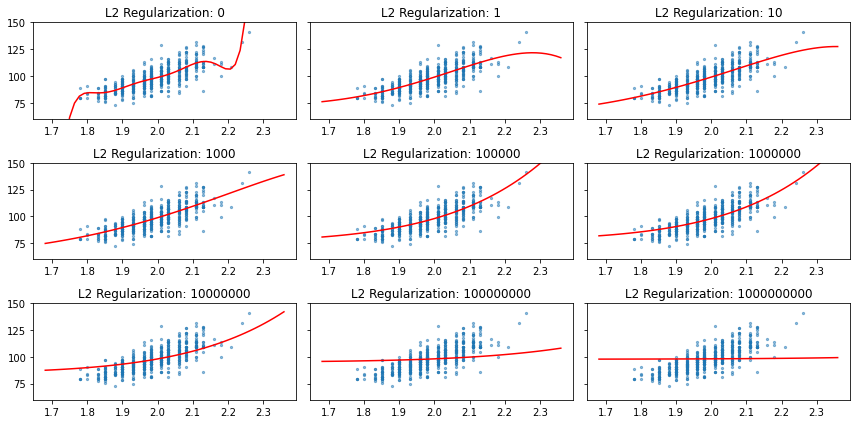

In [26]:
x = X.ravel()
fig, axes = plt.subplots(3, 3, figsize=(12, 6), sharey=True)
for k, alpha, y_p in zip(range(9), alphas, y_plots):
    i = k // 3
    j = k % 3
    x_p = X_plot.ravel()
    axes[i, j].scatter(x, y, s=5, alpha=0.5)
    axes[i, j].plot(x_p, y_p, color="red")
    axes[i, j].set_ylim(60, 150)
    axes[i, j].set_title("L2 Regularization: {:.0f}".format(alpha))
plt.tight_layout()
plt.show()

## 在類別預測任務於損失函數 $J(w)$ 也能夠加上 $\lambda w^Tw$ 抑制係數向量

\begin{equation}
J(w) = \frac{1}{m}(-ylog(\sigma(Xw)) - (1-y)log(1-\sigma(Xw)) + \lambda w^Tw)
\end{equation}

## 求解梯度 $J(w)$ 關於 $w$ 的偏微分

\begin{align}
\frac{\partial J}{\partial w} &= \frac{1}{m}(-y(1-\sigma(Xw))X - (1-y)(-\sigma(Xw)X) + 2\lambda w) \\
&=\frac{1}{m}(-X^Ty + y\sigma(Xw)X + X^T\sigma(Xw) - y\sigma(Xw)X + 2\lambda w) \\
&=\frac{1}{m}(-X^Ty + X^T\sigma(Xw) + 2\lambda w) \\
&=\frac{1}{m}(X^T(\sigma(Xw) - y) + 2\lambda w) \\
&=\frac{1}{m}(X^T(\sigma(Xw) - y) + \frac{1}{C}w) \text{, where } C=\frac{1}{2\lambda}
\end{align}

## 寫出具備 L2 正規化效果梯度遞減的式子

\begin{gather}
w := w - \alpha \frac{1}{m}(X^T(\sigma(X^{(train)}w) - y^{(train)}) + \frac{1}{C}w) \text{, where } C=\frac{1}{2\lambda} \\
w := w - \alpha \frac{1}{mC}w - \alpha \frac{1}{m}(X^T(\sigma(X^{(train)}w) - y^{(train)})) \\
w := w(1 - \alpha \frac{1}{mC}) - \alpha \frac{1}{m}(X^T(\sigma(X^{(train)}w) - y^{(train)}))
\end{gather}

## Scikit-Learn `LogisticRegression` 參數 `C` 與 L2 正規化 $\lambda$ 參數

- 倒數關係 $C=\frac{1}{2\lambda}$
- 當 `C` 愈大表示正規化效果愈低，反之 `C` 愈小表示正規化效果愈高。
- `C=1e6` 設定很大來讓正規化效果降到很低。

## 重點統整

- 現實世界中評估模型在測試資料上的表現不容易，時間與金錢成本上都比在驗證資料上實施來得高出許多。像是設計類似實驗組與對照組的測試環境、等待一段時間才會實現數值或標籤。
- 評估指標的選擇除了與任務種類相關，也與模型的應用場景有關。例如即便同屬於疾病的檢測分類模型，針對傳染疾病或罕見疾病所選擇的指標就有可能不同，這是由於和「誤分類」所衍生出的成本連動所致。

## 重點統整（續）

- 回歸模型表現的評估指標
    - 均方誤差（Mean squared error）
    - 平均絕對誤差（Mean absolute error）
- 分類器表現的評估指標
    - 準確率（Accuracy）
    - 精確率（Precision）
    - 召回率（Recall）
    - F1-score
    - ...etc.

## 重點統整（續）

- 誤差來源可以大抵分為
    - 訓練誤差（Training error）
    - 測試誤差（Testing error）
- 減少訓練誤差的具體做法
    - 增加梯度遞減的訓練次數。
    - 透過交叉驗證（Cross validation）的技巧消弭訓練與驗證資料切割所造成的誤差。
    - 增加特徵矩陣的欄位。
    - 超參數（Hyperparameter）調校。
    - 變換其他機器學習模型。
    - 製造衍生變數（特徵工程）。
- 減少測試誤差的具體做法：正規化